# Análisis de rendimiento deportivo.

## Fases del proyecto.

#### 1) Análisis de datos (Pandas).
#### 2) Visualización de los datos (Matplotlib).
#### 3) Cálculos (Numpy).

## Preguntas clave.
#### ¿Qué atleta muestra mayor mejora?
#### ¿En qué semana hubo el mejor rendimiento general?
#### ¿Qué atleta es más consistente?
#### ¿Hay alguna tendencia observable?

In [1]:
#Instalación de librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Creamos una semilla para tener los datos fijos.
np.random.seed(123)

In [3]:
# Creamos las listas.
atletas = ['Ana','Carlos','María','Javier','Laura']
disciplinas = ['Velocidad','Resistencia','Fuerza','Flexibilidad']

In [46]:
#Datos de rendimiento (puntuación 100) durante 8 semanas.
rendimiento = np.array([
    [85, 78, 82, 79, 88, 90, 92, 95],  # Ana
    [72, 75, 80, 82, 85, 83, 88, 90],  # Carlos  
    [90, 88, 85, 87, 89, 91, 94, 96],  # Maria
    [65, 70, 75, 78, 80, 82, 85, 88],  # Javier
    [88, 85, 87, 89, 91, 90, 93, 95]   # Laura
])

semanas = ['Semana_1','Semana_2','Semana_3','Semana_4','Semana_5','Semana_6','Semana_7','Semana_8']

# Análisis de datos (Pandas).

In [5]:
df_rendimiento = pd.DataFrame(rendimiento, index=atletas, columns=semanas)

In [6]:
df_rendimiento

,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8
Ana,85,78,82,79,88,90,92,95
Carlos,72,75,80,82,85,83,88,90
María,90,88,85,87,89,91,94,96
Javier,65,70,75,78,80,82,85,88
Laura,88,85,87,89,91,90,93,95


# Estadística individual.

In [13]:
df_rendimiento.loc[['Ana','Carlos','María','Javier','Laura']].agg(['mean','min','max'],axis=1)

,mean,min,max
Ana,86.125,78.0,95.0
Carlos,81.875,72.0,90.0
María,90.000,85.0,96.0
Javier,77.875,65.0,88.0
Laura,89.750,85.0,95.0


#### Los datos reflejan que de nuestros atletas, María cuenta con la media y el máximo más solido que los demás atletas.
#### Javier es el atleta con el mínimo y máximo más bajo de todos.

# Estadísticas por Semana.

In [8]:
print('SEMANAS --> TOTAL - MEDIA - MÍNIMO - MÁXIMO ')
df_rendimiento[['Semana_1','Semana_2','Semana_3','Semana_4','Semana_5','Semana_6','Semana_7','Semana_8']].agg(['sum','mean','min','max'])


SEMANAS --> TOTAL - MEDIA - MÍNIMO - MÁXIMO 


,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8
sum,400.0,396.0,409.0,415.0,433.0,436.0,452.0,464.0
mean,80.0,79.2,81.8,83.0,86.6,87.2,90.4,92.8
min,65.0,70.0,75.0,78.0,80.0,82.0,85.0,88.0
max,90.0,88.0,87.0,89.0,91.0,91.0,94.0,96.0


#### La semana 8 es la semana donde más datos se generaró, también es la semana donde el hubo el máximo más alto.
#### La semana 1 es la semana donde menos rendimiento se reportó.

# Estadística descriptiva.

In [9]:
estadisticas=df_rendimiento.describe()

In [10]:
estadisticas

,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,Semana_6,Semana_7,Semana_8
count,5.000000,5.000000,5.000000,5.00000,5.00000,5.00000,5.000000,5.000000
mean,80.000000,79.200000,81.800000,83.00000,86.60000,87.20000,90.400000,92.800000
std,10.931606,7.328028,4.658326,4.84768,4.27785,4.32435,3.781534,3.563706
min,65.000000,70.000000,75.000000,78.00000,80.00000,82.00000,85.000000,88.000000
25%,72.000000,75.000000,80.000000,79.00000,85.00000,83.00000,88.000000,90.000000
50%,85.000000,78.000000,82.000000,82.00000,88.00000,90.00000,92.000000,95.000000
75%,88.000000,85.000000,85.000000,87.00000,89.00000,90.00000,93.000000,95.000000
max,90.000000,88.000000,87.000000,89.00000,91.00000,91.00000,94.000000,96.000000


# Visualización

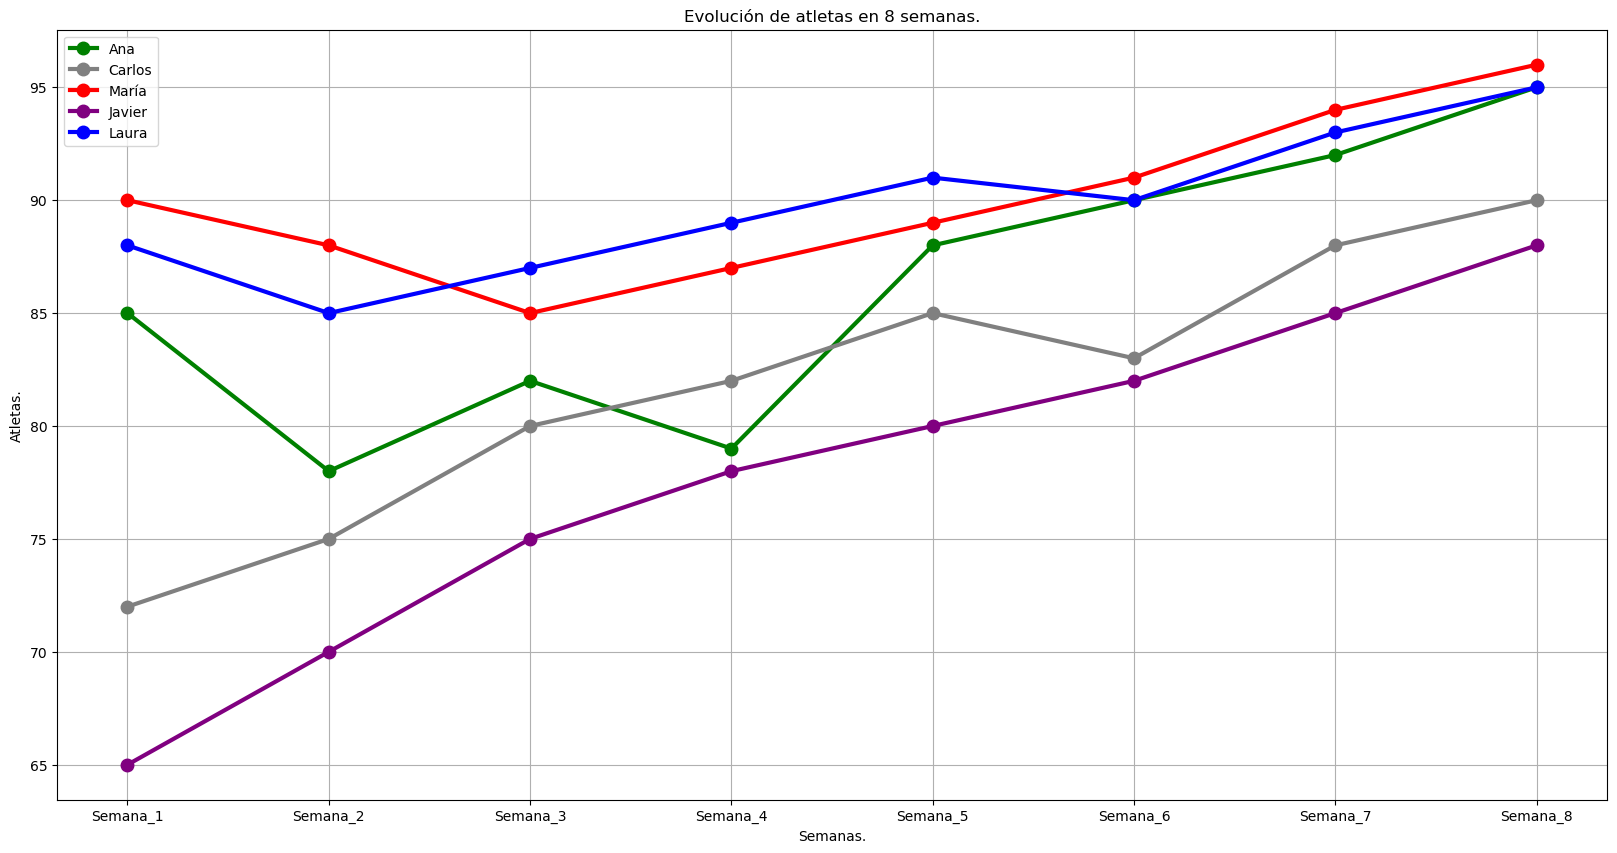

In [32]:
#definimos tamaño de la figura.
plt.figure(figsize=(20,10))

colores_atletas = {
    'Ana' : 'green',
    'Carlos' : 'gray',
    'María' : 'red',
    'Javier' : 'purple',
    'Laura' : 'blue'
}

for atleta in atletas:
    plt.plot(
        semanas,
        df_rendimiento.loc[atleta],
        marker='o',
        linestyle='-',
        color=colores_atletas[atleta],
        linewidth = 3,
        markersize = 9,
        label = atleta, 
    )
plt.title('Evolución de atletas en 8 semanas.')
plt.xlabel('Semanas.')
plt.ylabel('Atletas.')
plt.legend()
plt.grid(True)
plt.show()

# Progreso semana a semana.

In [41]:
# Diferencia absoluta entre semanas consecutivas.
progreso_weeks = df_rendimiento.diff (axis=1)    # diff es la diferencias, en este caso en un nuestra fila 1.
print(progreso_weeks)

        Semana_1  Semana_2  Semana_3  Semana_4  Semana_5  Semana_6  Semana_7  \
Ana          NaN        -7         4        -3         9         2         2   
Carlos       NaN         3         5         2         3        -2         5   
María        NaN        -2        -3         2         2         2         3   
Javier       NaN         5         5         3         2         2         3   
Laura        NaN        -3         2         2         2        -1         3   

        Semana_8  
Ana            3  
Carlos         2  
María          2  
Javier         3  
Laura          2  


# Progreso Porcentual.

In [45]:
progreso_por = df_rendimiento.pct_change(axis=1)* 100  # Donde pct_change() representa el cambio porcentual entre elementos consecutivos.
print(progreso_por.round(2))

        Semana_1  Semana_2  Semana_3  Semana_4  Semana_5  Semana_6  Semana_7  \
Ana          NaN     -8.24      5.13     -3.66     11.39      2.27      2.22   
Carlos       NaN      4.17      6.67      2.50      3.66     -2.35      6.02   
María        NaN     -2.22     -3.41      2.35      2.30      2.25      3.30   
Javier       NaN      7.69      7.14      4.00      2.56      2.50      3.66   
Laura        NaN     -3.41      2.35      2.30      2.25     -1.10      3.33   

        Semana_8  
Ana         3.26  
Carlos      2.27  
María       2.13  
Javier      3.53  
Laura       2.15  


# Respuestas clave.

### ¿Qué atleta muestra mayor mejora?

#### Podemos ver que María desde la semana 1 a la semana 8 tiene un mejoría de 6 puntos, siendo la que obtiene el mayor rendimiento.
#### Sin embargo, Javier no obtuvo un máximo sobresaliente pero tiene una mejora de 23 puntos entre la semana 1 y la semana 8, siendo este el que muestra mayor mejora entre todos los atletas.

### ¿En qué semana hubo el mejor rendimiento general?

#### Podemos argüir que la semana 8, esta última semana es la que ha presentado una mejora en el rendimiento general; siendo la semana donde todos los atletas han tenido mejorias además de ser la semana donde estos obtienen sus máximos de rendimiento.

### ¿Qué atleta es más consistente?

#### Javier ha demostrado ser el único atleta que no presenta una regresión, todo lo contrario, en cada semana ha mostrado una mejoria llegando a obtener en la semana 8 una mejora de 23 puntos de rendimiento desde la semana 1, siendo este el atleta qué obtuvo más rendimiento en general.

#### Cabe destacar que Ana de la semana 4 a la semana 5 obtiene una mejoria significativa; pasando a tomar  8 puntos de mejoria solamente entre una semana y la otra.

### ¿Hay una tendencia observable?

#### Podemos observar que existe una tendencia a la mejoria de cada uno de los atletas, los números y la gráfica nos muestran como todos los atletas incluso con sus retrosesos tienden a obtener una mejora; podemos argüir que después de la semana 8 estos seguiran con mejoria hasta que lleguen a un punto de estabilidad.